In [75]:
#Import all the relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import scipy.stats as stats

In [76]:
#Set up user defined constants and file info
NCmetadatafile = '220211_2M1F_NaiveChoice_metadata.csv'
FCmetadatafile = '220211_2F1M_final_metadata.csv'
huddle_time = 20 #ms (Value taken from Nerissa though there is much debate about whether this is correct)
PPI_floor = 0.75 #value taken from Kim

make_duplicate_plots = True

In [77]:
#Define support functions in this cell

def extract_lane_info(file_list):
    extracted_names = []
    for file in range(0, len(file_list),1):
        components = file_list[file].split('_')
        for l in range(0, len(components),1):
            if "Lane" in components[l]:
                extracted_names.append(components[l])
    return extracted_names

def adjacent_columns(file_list):
    num_adjacentcolumns = []
    names = extract_lane_info(file_list)
    for name in names:
        if re.search('Lane1|Lane4', name):
            num_adjacentcolumns.append(1)
        else:
            num_adjacentcolumns.append(2)
    return num_adjacentcolumns

def focalanimalfunc(file_list):
    focal_animal = []
    for file in file_list:
        if "NaiveChoice" in file:
            focal_animal.append('M')
        elif "final" in file:
            focal_animal.append('F')
        else: 
            print ("")
    return focal_animal
    
def calculate_PPI(datafile):
    #calculate time huddling
    time_huddling_right = []
    time_huddling_left = []
    for i in range(0, len(datafile),1):
        row = datafile.loc[i]
        timecontactright = row.Contact_Right_stop - row.Contact_Right_start
        timecontactleft = row.Contact_Left_stop - row.Contact_Left_start
        if timecontactright >= huddle_time:
            time_huddling_right.append(timecontactright)
        if timecontactleft >= huddle_time:
            time_huddling_left.append(timecontactleft)
    total_huddle_time_right = np.nansum(time_huddling_right)
    total_huddle_time_left = np.nansum(time_huddling_left)
    PPI = (total_huddle_time_right - total_huddle_time_left)/(total_huddle_time_right + total_huddle_time_left)
    return PPI

def calculate_winner(datafile):
    if calculate_PPI(datafile) >= PPI_floor:
        return 'Right'
    elif calculate_PPI(datafile) <= -(PPI_floor):
        return 'Left'
    else:
        return 'None'
    
#PLOTTING FUNCTIONS
    
def relplot (datatable, xaxis, yaxis, plottype = 'scatter'):
    #Unless specified, default relplot is scatter
    sns.relplot(
    data = datatable, kind = plottype,
    x = xaxis, y = yaxis, #col = "time", 
    #hue = "Left", style = 'Left', size = 'size'
    )
    return
def displot(datatable, xaxis, yaxis, plottype = 'hist'):
    #Unless specified, default displot is histogram
    sns.displot(
        data = datatable, 
        kind = plottype, 
        x = xaxis,
        y = yaxis, #col = "time", 
        #color = color #"Left", style = 'Left', size = 'size'
    )
    return

#Statistics functions

#for a fisher test, you need to form a 2x2 contingency table
#null hypothesis is that there are no associations between rows and columns
#alternative hypothesis is that there is some association between rows and columns

#p-value gives probability under null hypothesis of getting a table at least as extreme as the one that was actually observed
def fishertest(datatable, )
    odd_ratio, p_value = stats.fisher_exact(contingencytable)
    print odd_ratio
    print p_value
    return 

SyntaxError: expected ':' (935379073.py, line 86)

In [78]:
#Handle the raw data files for naive choice - make a megatable

# 1 - Generate a list of all the files to work on
#Import metadata as a DataFrame
NCmetadatatable = pd.read_csv(NCmetadatafile)
FCmetadatatable = pd.read_csv(FCmetadatafile)

#Define the file path for this data files
data_dir = os.path.join('C:\\','Users','vashv','OneDrive','Documents','GitHub','ppt-lanes','data_files')


#Create a list of files for this project
allDataFiles = []
allDataFiles += [os.path.join(data_dir, each) for each in os.listdir(data_dir) if 'Lane' in each]



# 2 - Set up places to store all your eventual calculations
lane = extract_lane_info(allDataFiles)
num_adjacent_columns = adjacent_columns(allDataFiles)
focal_animal = focalanimalfunc(allDataFiles)

PPI_column = []

winner_column = []

absolute_PPI = []

absolute_winner = []

# 3 - Iterate over that list

for file in allDataFiles:
    #Load data
    thisdata = pd.read_csv(file)
    #do all computations by calling functions
    thisPPI = calculate_PPI(thisdata)
    thisabsolutePPI = abs(thisPPI)
    thiswinner = calculate_winner(thisdata)
    if thiswinner == 'None':
        thisabsolutewinner = 'None'
    else:
        thisabsolutewinner = 'Winner'
    #put all of my file calculations in group data table
    PPI_column.append(thisPPI)
    absolute_PPI.append(thisabsolutePPI)
    winner_column.append(thiswinner)
    absolute_winner.append(thisabsolutewinner)

# Consolidate all your calculations into one big table

consolidated_data = {'Lane': lane, '# Adjacent Columns': num_adjacent_columns, 'Focal animal': focal_animal, 'PPI': PPI_column, 
                    'Absolute PPI': absolute_PPI, 'Winner': winner_column, 'Absolute Winner': absolute_winner}
datatable = pd.DataFrame(data = consolidated_data)
datatable.to_csv('Summary_table')

In [79]:
datatable

,Lane,# Adjacent Columns,Focal animal,PPI,Absolute PPI,Winner,Absolute Winner
0,Lane1,1,F,-0.954829,0.954829,Left,Winner
1,Lane2,2,F,0.284248,0.284248,None,None
2,Lane1,1,F,-0.218244,0.218244,None,None
3,Lane2,2,F,0.844684,0.844684,Right,Winner
4,Lane1,1,F,1.000000,1.000000,Right,Winner
5,Lane2,2,F,0.911561,0.911561,Right,Winner
6,Lane3,2,F,0.742581,0.742581,None,None
7,Lane4,1,F,0.919426,0.919426,Right,Winner
8,Lane3,2,F,0.973030,0.973030,Right,Winner
9,Lane4,1,F,-0.682883,0.682883,None,None


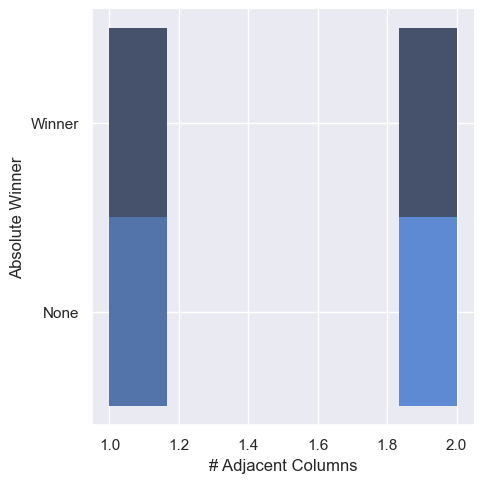

In [80]:
#---MAKE SOME PLOTS WITH DATA TABLES---

#lOAD RELEVANT DATA TABLES
all_summary = pd.read_csv('Summary_table')

#Plot that data
sns.set_theme()

#NCsummary.plot(x = '# Adjacent Columns', y = 'PPI', style = 'o')
displot(all_summary, "# Adjacent Columns", 'Absolute Winner')



#Good to see some sort of distribution?
#Hard to say what the various colors mean - does dark mean more values there?
#How do I change that?

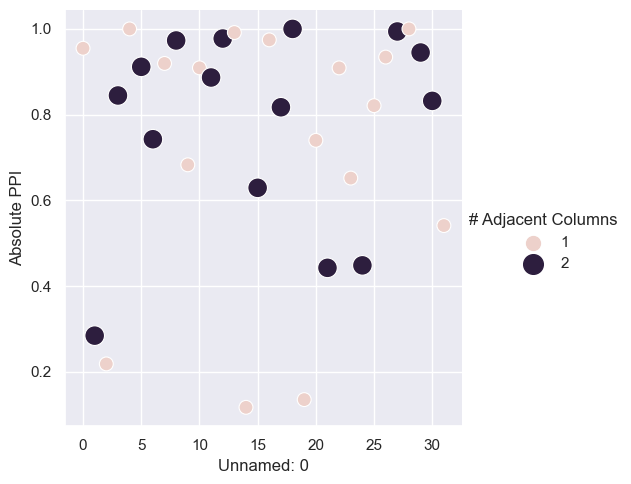

In [81]:
sns.relplot(all_summary, x = 'Unnamed: 0', y = 'Absolute PPI', size = '# Adjacent Columns', hue = '# Adjacent Columns', sizes = [100,200])
#I am for no good reason, having great difficulty making this scatter plot


(0.0, 1.05)

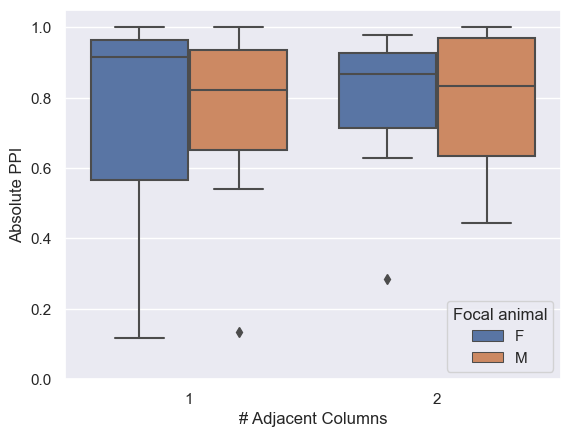

In [82]:
sns.boxplot(all_summary, x = '# Adjacent Columns', y = 'Absolute PPI', hue = 'Focal animal')
plt.ylim(0, 1.05)

<AxesSubplot:xlabel='# Adjacent Columns', ylabel='Count'>

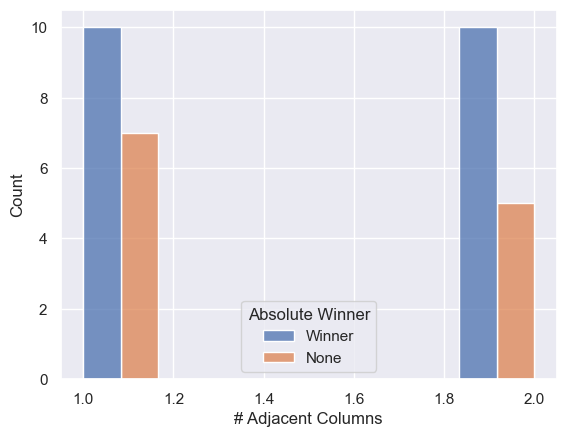

In [83]:
sns.histplot(all_summary, x = '# Adjacent Columns', hue = 'Absolute Winner', multiple = 'dodge')

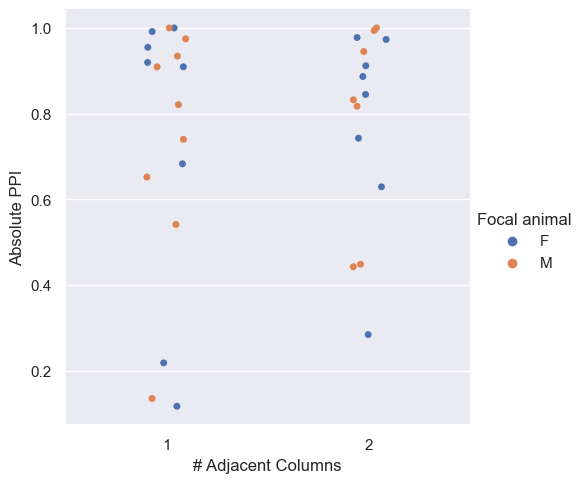

In [84]:
sns.catplot(all_summary, x = '# Adjacent Columns', y = 'Absolute PPI', hue = 'Focal animal')

<AxesSubplot:xlabel='# Adjacent Columns', ylabel='Count'>

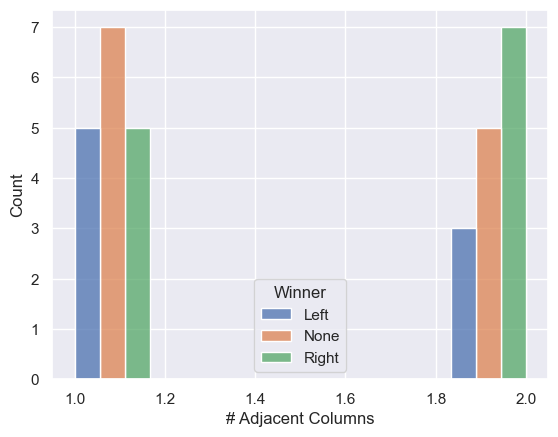

In [85]:
sns.histplot(all_summary, x = '# Adjacent Columns', hue = 'Winner', multiple = 'dodge')

<AxesSubplot:xlabel='Absolute PPI', ylabel='Count'>

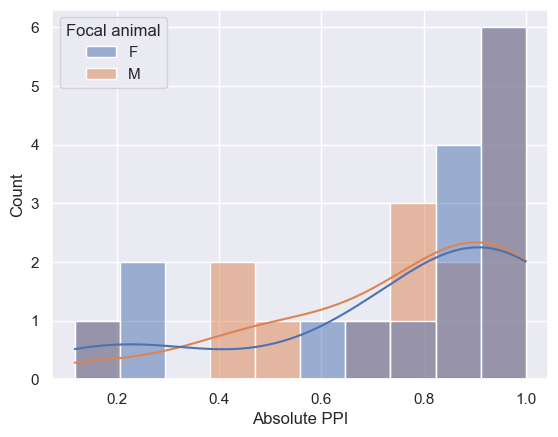

In [86]:
sns.histplot(all_summary, x = 'Absolute PPI', hue = 'Focal animal', bins = 10, kde = True, #element = 'step'
            )

In [87]:
# Next steps with plots

#So for the histograms about left/right/no winners,
#I would see if you can try breaking that out to side by side bar plots,
#with a bar for each category (rather than sharing a vertical bar). 
#I think it would be interesting to look at left vs right vs no in one version
#and a separate version with just yes vs no (so lump left and right together)

#Plot this is based on - 


In [88]:
#Statistics:
#Build a table
#columns = winner
#rows - lane number 


In [89]:
datatable

,Lane,# Adjacent Columns,Focal animal,PPI,Absolute PPI,Winner,Absolute Winner
0,Lane1,1,F,-0.954829,0.954829,Left,Winner
1,Lane2,2,F,0.284248,0.284248,None,None
2,Lane1,1,F,-0.218244,0.218244,None,None
3,Lane2,2,F,0.844684,0.844684,Right,Winner
4,Lane1,1,F,1.000000,1.000000,Right,Winner
5,Lane2,2,F,0.911561,0.911561,Right,Winner
6,Lane3,2,F,0.742581,0.742581,None,None
7,Lane4,1,F,0.919426,0.919426,Right,Winner
8,Lane3,2,F,0.973030,0.973030,Right,Winner
9,Lane4,1,F,-0.682883,0.682883,None,None


   Left Winner  Right Winner  No Winner
0            5             5          7
1            3             7          5
   Yes Winner  No Winner
0          10          7
1          10          5
SignificanceResult(statistic=0.7142857142857143, pvalue=0.7256694233528399)


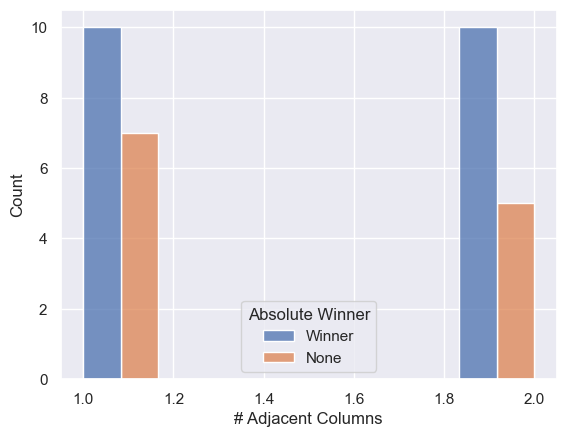

In [90]:
#What is Fisher's exact test?
# statistical test that determines if two categorial variables have non
#random connections or we can say that it's used to check whether two category
#variables have a significant relationship

#Null hypothesis: No associations between rows (winner) and columns( adjacent lane)
#Alternative hypothesis - some association between winner and adjacent lanes

#Need to build a 2 x 2 table
#            yeswinner  nowinner
#1lane    N               N
#2lane    N               N
Left_winner_1 = 0
Right_winner_1 = 0

yeswinner_1 = 0
nowinner_1 = 0

Left_winner_2 = 0
Right_winner_2 = 0

yeswinner_2 = 0
nowinner_2 = 0
lanes = datatable['# Adjacent Columns']
Winners = datatable['Winner']




for i in range(0, len(datatable),1):
    if lanes[i] == 1 and Winners[i] == 'None':
        nowinner_1+=1
    elif lanes[i] == 1 and Winners[i] == 'Right':
        Right_winner_1 +=1
        yeswinner_1 += 1
    elif lanes[i] == 1 and Winners[i] == 'Left':
        Left_winner_1 +=1
        yeswinner_1+=1
    elif lanes[i] == 2 and Winners[i] == 'None':
        nowinner_2+=1
    elif lanes[i] == 2 and Winners[i] == 'Right':
        Right_winner_2+=1
        yeswinner_2+=1
    elif lanes[i] == 2 and Winners[i] == 'Left':
        Left_winner_2+=1
        yeswinner_2 +=1
        
lane_v_winner = pd.DataFrame({"Left Winner": [Left_winner_1,Left_winner_2], 'Right Winner':[Right_winner_1,Right_winner_2], 'No Winner':[nowinner_1,nowinner_2]})
lane_v_absolute_winner = pd.DataFrame({"Yes Winner": [yeswinner_1, yeswinner_2], "No Winner":[nowinner_1, nowinner_2]})

print(lane_v_winner)
print(lane_v_absolute_winner)

sns.histplot(all_summary, x = '# Adjacent Columns', hue = 'Absolute Winner', multiple = 'dodge')
#perform the Fisher test
print(stats.fisher_exact(lane_v_absolute_winner))
#Barnard exact is a more powerful version of Fisher - Fisher should be used when both margins are fixed 
#print(stats.barnard_exact(forFisher))


AxesSubplot(0.125,0.11;0.775x0.77)


Power_divergenceResult(statistic=array([0.5       , 0.33333333, 0.33333333]), pvalue=array([0.47950012, 0.56370286, 0.56370286]))

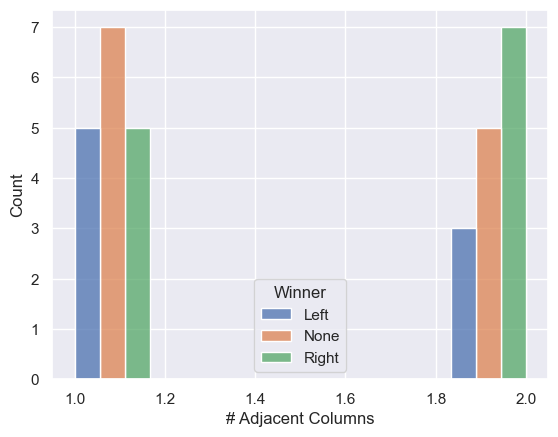

In [95]:
print(sns.histplot(all_summary, x = '# Adjacent Columns', hue = 'Winner', multiple = 'dodge'))
f_exp_lane = [4, 6, 6]
stats.chisquare(lane_v_winner, f_exp = f_exp_lane)

In [63]:
#For each sex group (final is 1 male choosing between w females and 
#                    naive is 1 female choosing between 2 males)
#You can do a chi-squared test on the table with the left/right/no winner version, too


#What is a chi-squared
#Used to compare expected results with observed results
#Want to make a 2x3 table
                 #Left  #Right   #None
#Final(1Male)      N      N        N
#Naive(1Female)    N      N        N

Leftwinner_M = 0
Rightwinner_M = 0
Nowinner_M = 0
Leftwinner_F = 0
Rightwinner_F = 0
Nowinner_F = 0
focalanimal = datatable['Focal animal']
Winners = datatable['Winner']


for i in range(0, len(datatable),1):
    if focalanimal[i] == 'M' and Winners[i] == 'Left':
        Leftwinner_M+=1
    elif focalanimal[i] == 'M' and Winners[i] == 'Right':
        Rightwinner_M+=1
    elif focalanimal[i] == 'M' and Winners[i] == 'None':
        Nowinner_M+=1
    elif focalanimal[i] == 'F' and Winners[i] == 'Left':
        Leftwinner_F+=1
    elif focalanimal[i] == 'F' and Winners[i] == 'Right':
        Rightwinner_F+=1
    elif focalanimal[i] == 'F' and Winners[i] == 'None':
        Nowinner_F+=1

focal_v_winner = pd.DataFrame({"Left Winner": [Leftwinner_M, Leftwinner_F], "Right Winner":[Rightwinner_M, Rightwinner_F], 'No Winner': [Nowinner_M, Nowinner_F]})
focal_v_absolute_winner = pd.DataFrame({'Yes Winner':[Leftwinner_M + Rightwinner_M, Leftwinner_F + Rightwinner_F], "No Winner": [Nowinner_M, Nowinner_F]})
print(focal_v_winner)
print(focal_v_absolute_winner)

print(stats.fisher_exact(focal_v_absolute_winner))

#stats.chisquare(forChiSquare)
#So what I described is a total of four plots, with stats: 
#one for each group that's a 2x3 table and one for each group that's a 2x2 table


   Left Winner  Right Winner  No Winner
0            4             6          6
1            4             6          6
   Yes Winner  No Winner
0          10          6
1          10          6
SignificanceResult(statistic=1.0, pvalue=1.0)


AxesSubplot(0.125,0.11;0.775x0.77)


Power_divergenceResult(statistic=array([0., 0., 0.]), pvalue=array([1., 1., 1.]))

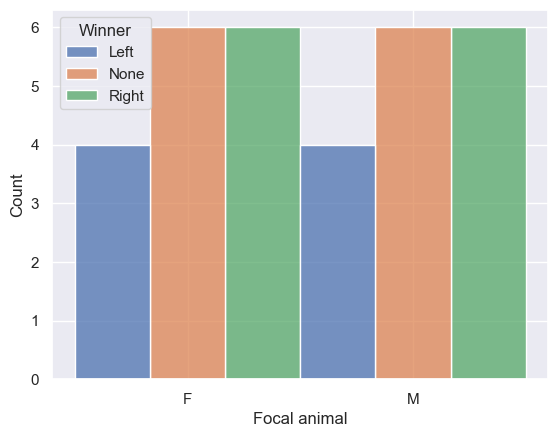

In [97]:
print(sns.histplot(all_summary, x = 'Focal animal', hue = 'Winner', multiple = 'dodge'))
stats.chisquare(focal_v_winner)
